In [1]:
import matplotlib.pyplot as plt
from Composite.CreateLines.CreateLines import CreateLines

In [2]:
lines = {
    "r": 2.5,
    "Nx_sq": 1,
    "Ny_sq": 1,
    "type":  'circle' # 'circle' or 'sin'
}

lines = CreateLines(lines)

In [3]:
lines["designs"]["B"]

{'ly_0': [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 5.00250125e-03, 0.00000000e+00],
         [0.00000000e+00, 1.00050025e-02, 0.00000000e+00],
         ...,
         [0.00000000e+00, 9.98999500e+00, 0.00000000e+00],
         [0.00000000e+00, 9.99499750e+00, 0.00000000e+00],
         [0.00000000e+00, 1.00000000e+01, 0.00000000e+00]], shape=(2000, 3)),
  array([[1.66666667e+00, 0.00000000e+00, 0.00000000e+00],
         [1.66666667e+00, 5.00250125e-03, 0.00000000e+00],
         [1.66666667e+00, 1.00050025e-02, 0.00000000e+00],
         ...,
         [1.66666667e+00, 9.98999500e+00, 0.00000000e+00],
         [1.66666667e+00, 9.99499750e+00, 0.00000000e+00],
         [1.66666667e+00, 1.00000000e+01, 0.00000000e+00]], shape=(2000, 3)),
  array([[3.33333333e+00, 0.00000000e+00, 0.00000000e+00],
         [3.33333333e+00, 5.00250125e-03, 0.00000000e+00],
         [3.33333333e+00, 1.00050025e-02, 0.00000000e+00],
         ...,
         [3.33333333e+00, 9

In [4]:
def plot_design(design):
    # to list
    design = [design[key] for key in design.keys()]
    colors = ['r','g','b','y']
    for trajs, color in zip(design, colors):
        for traj in trajs:
            plt.plot(traj[:,0],traj[:,1],color=color)
            # init 
            plt.plot(traj[0,0],traj[0,1],'o',color=color)

<Figure size 640x480 with 0 Axes>

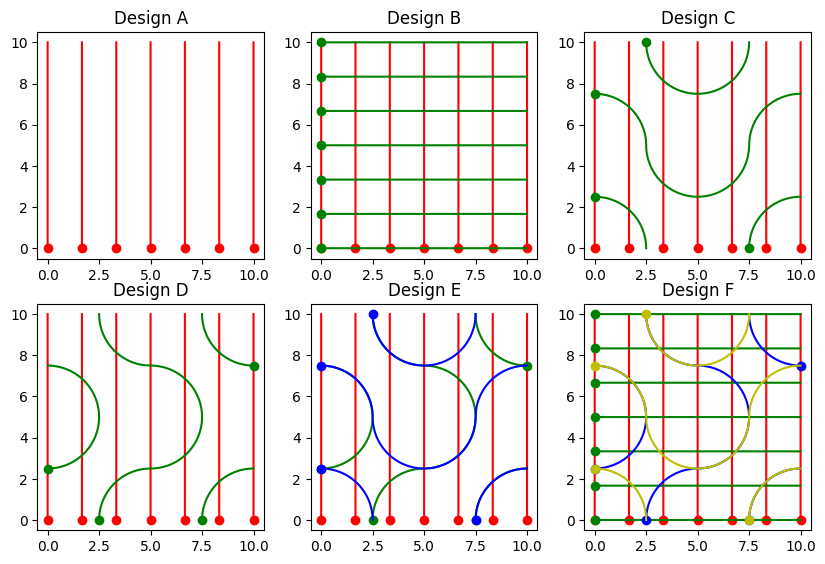

In [5]:

fig = plt.figure()
designs = [ lines["designs"][ikey] 
           for ikey in lines["designs"].keys() ]

nds_sq = len(designs)
nds = int(nds_sq**0.5) 
nds = nds if nds**2 >= nds_sq else nds+1

fig = plt.figure()
fig.set_size_inches(10,10)
for i,idesign in enumerate(designs):
    plt.subplot(nds,nds,i+1)
    plot_design(idesign)
    plt.title('Design %s' % chr(65+i))
    # aspect ratio
    plt.gca().set_aspect('equal', adjustable='box')


[ 7.50000000e+00 -3.55271368e-15  0.00000000e+00] [10.   2.5  0. ]
[10.   7.5  0. ] [ 7.5 10.   0. ]
[-3.55271368e-15  2.50000000e+00  0.00000000e+00] [-3.55271368e-15  7.50000000e+00  0.00000000e+00]
[ 2.50000000e+00 -3.55271368e-15  0.00000000e+00] [ 2.5 10.   0. ]


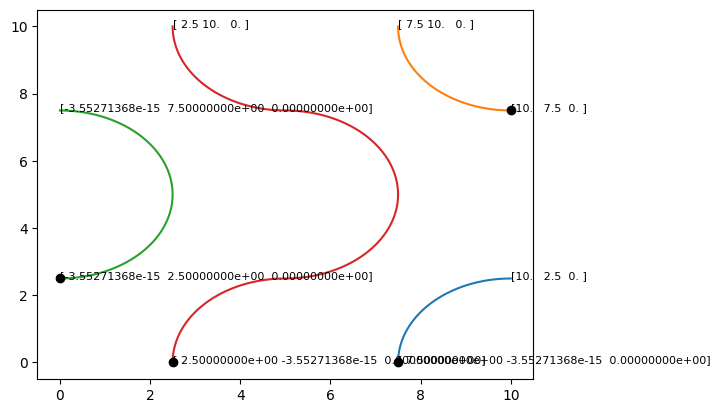

In [6]:
E_ly_1 = lines["designs"]["D"]["ly_1"]
fig = plt.figure()
for i in range(len(E_ly_1)):
    plt.plot(E_ly_1[i][:,0],E_ly_1[i][:,1],'-')
    # 
    plt.plot(E_ly_1[i][0,0],E_ly_1[i][0,1],'ko')

# draw in the initial and final points the coordinates
for i in range(len(E_ly_1)):
    plt.text(E_ly_1[i][0,0],E_ly_1[i][0,1],'%s' % E_ly_1[i][0,:],fontsize=8)
    plt.text(E_ly_1[i][-1,0],E_ly_1[i][-1,1],'%s' % E_ly_1[i][-1,:],fontsize=8)
    print(E_ly_1[i][0,:],E_ly_1[i][-1,:])

In [7]:

import os,shutil
# remove output folder if exists
try: 
    shutil.rmtree("output")
except: 
    pass

# create output folder
os.makedirs("output")
os.makedirs("output/mesh")
os.makedirs("output/ccx")

In [8]:
from Composite.CreateComposite.CreateComposite import CreateComposite

SyntaxError: invalid syntax (CreateBox.py, line 98)

In [ ]:
params_composite ={
    "r"         :  0.25,
    "Lx"     :  lines["Lx"],
    "Ly"     :  lines["Ly"],
    "trajs_layers" : lines["designs"]["E"],
    "h"         :  0.65,
    "z0"        :  2.82/2,
    "density"   : 4,
    "interface_factor"  :  1.2,
    "with_interface"    : False,
    
}
output_folder = ["output","mesh"]
params_composite = CreateComposite(params_composite,output_folder)

In [10]:
from Composite.CreateSimulation.CreateSimulation import CreateSimulation

In [ ]:
CreateSimulation("output/mesh")